<a href="https://colab.research.google.com/github/Susheel06/MIS2_PS2/blob/master/MIS2_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('/content/Data Analytics Works (1).xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(2)

,full_name,age,marital_status,gender,which_type_of_organization_do_you_work_for?,name_of_profession,what_is_the_type_of_home_that_you_own?,number_of_floors_in_house,how_many_people_live_in_your_householdincluding_children?,no_of_rooms_in_your_house,"do_you_plan_to_build_an_additional_floor?_if_other,_what_does_it_depend_on?",what_percentage_of_your_roof_are_you_ready_to_give_for_solar?,plot_size_of_the_house_in_square_yards,do_you_have_a_home_loan?,how_many_of_the_below_vehicles_do_you_own?_[2-wheelers],how_many_of_the_below_vehicles_do_you_own?_[4-wheelers],which_payment_method_do_you_use_the_most?,do_you_currently_have_an_emi_for_any_home_appliance?,what_is_the_range_of_your_family's_average_monthly_earnings?,rate_the_following_websites_in_terms_of_your_usage_time_[google],rate_the_following_websites_in_terms_of_your_usage_time_[facebook],rate_the_following_websites_in_terms_of_your_usage_time_[whatsapp],rate_the_following_websites_in_terms_of_your_usage_time_[youtube],rate_the_following_websites_in_terms_of_your_usage_time_[other_sites],what_power_backup_do_you_use?,how_much_aware_are_you_about_solar?,"rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[power_backup]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[_increase_in_electricity_prices.]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[fairly_good_saving_on_the_power_bill_today]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[long_life_span_of_a_solar_power_system_25_years_or_more__with_a_low_maintainance]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[interest_in_new_technology]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[environment_friendly]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[status_symbol]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[earn_from_empty_roof]",what_electrical_appliances_do_you_own?,what_are_your_appliances_brands?__[ac],what_are_your_appliances_brands?__[refrigerator],what_are_your_appliances_brands?__[computer],what_are_your_appliances_brands?__[tv],what_are_your_appliances_brands?__[water_heater],what_are_your_appliances_brands?__[washing_machine],what_is_the_next_appliance_you_want_to_buy?,"to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[number_of_years_it_takes_for_the_investment_to_pay_back_usually_>_10_years]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[not_getting_sufficient_money_for_extra_power_generated_]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_government_incentives]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_appropriate_loan_options]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[high_cost_of_solar_power_systems]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[solar_panels_lead_to_concerns_on_outlook_of_the_house]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_dont_understand_solar]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_don't_know_a_good_solar_installer]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=leas

In [ ]:
def state(x):
  try:
    z=list(x.split())
    f=z[0]
    geolocator = Nominatim()
    loc = geolocator.geocode(f)
    ls = loc.address
    p = ls.split(',')
    try:
      l=int(p[-2])/2
      return p[-3]
    except:
      return p[-2]

  except:
    return 'No state'


In [ ]:
df['state_name'] = df['which_city_is_your_house_at?'].apply(lambda x: state(x))
df.head()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,full_name,age,marital_status,gender,which_type_of_organization_do_you_work_for?,name_of_profession,what_is_the_type_of_home_that_you_own?,number_of_floors_in_house,how_many_people_live_in_your_householdincluding_children?,no_of_rooms_in_your_house,"do_you_plan_to_build_an_additional_floor?_if_other,_what_does_it_depend_on?",what_percentage_of_your_roof_are_you_ready_to_give_for_solar?,plot_size_of_the_house_in_square_yards,do_you_have_a_home_loan?,how_many_of_the_below_vehicles_do_you_own?_[2-wheelers],how_many_of_the_below_vehicles_do_you_own?_[4-wheelers],which_payment_method_do_you_use_the_most?,do_you_currently_have_an_emi_for_any_home_appliance?,what_is_the_range_of_your_family's_average_monthly_earnings?,rate_the_following_websites_in_terms_of_your_usage_time_[google],rate_the_following_websites_in_terms_of_your_usage_time_[facebook],rate_the_following_websites_in_terms_of_your_usage_time_[whatsapp],rate_the_following_websites_in_terms_of_your_usage_time_[youtube],rate_the_following_websites_in_terms_of_your_usage_time_[other_sites],what_power_backup_do_you_use?,how_much_aware_are_you_about_solar?,"rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[power_backup]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[_increase_in_electricity_prices.]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[fairly_good_saving_on_the_power_bill_today]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[long_life_span_of_a_solar_power_system_25_years_or_more__with_a_low_maintainance]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[interest_in_new_technology]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[environment_friendly]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[status_symbol]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[earn_from_empty_roof]",what_electrical_appliances_do_you_own?,what_are_your_appliances_brands?__[ac],what_are_your_appliances_brands?__[refrigerator],what_are_your_appliances_brands?__[computer],what_are_your_appliances_brands?__[tv],what_are_your_appliances_brands?__[water_heater],what_are_your_appliances_brands?__[washing_machine],what_is_the_next_appliance_you_want_to_buy?,"to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[number_of_years_it_takes_for_the_investment_to_pay_back_usually_>_10_years]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[not_getting_sufficient_money_for_extra_power_generated_]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_government_incentives]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_appropriate_loan_options]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[high_cost_of_solar_power_systems]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[solar_panels_lead_to_concerns_on_outlook_of_the_house]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_dont_understand_solar]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_don't_know_a_good_solar_installer]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=leas

In [ ]:
df.tail()

,full_name,age,marital_status,gender,which_type_of_organization_do_you_work_for?,name_of_profession,what_is_the_type_of_home_that_you_own?,number_of_floors_in_house,how_many_people_live_in_your_householdincluding_children?,no_of_rooms_in_your_house,"do_you_plan_to_build_an_additional_floor?_if_other,_what_does_it_depend_on?",what_percentage_of_your_roof_are_you_ready_to_give_for_solar?,plot_size_of_the_house_in_square_yards,do_you_have_a_home_loan?,how_many_of_the_below_vehicles_do_you_own?_[2-wheelers],how_many_of_the_below_vehicles_do_you_own?_[4-wheelers],which_payment_method_do_you_use_the_most?,do_you_currently_have_an_emi_for_any_home_appliance?,what_is_the_range_of_your_family's_average_monthly_earnings?,rate_the_following_websites_in_terms_of_your_usage_time_[google],rate_the_following_websites_in_terms_of_your_usage_time_[facebook],rate_the_following_websites_in_terms_of_your_usage_time_[whatsapp],rate_the_following_websites_in_terms_of_your_usage_time_[youtube],rate_the_following_websites_in_terms_of_your_usage_time_[other_sites],what_power_backup_do_you_use?,how_much_aware_are_you_about_solar?,"rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[power_backup]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[_increase_in_electricity_prices.]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[fairly_good_saving_on_the_power_bill_today]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[long_life_span_of_a_solar_power_system_25_years_or_more__with_a_low_maintainance]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[interest_in_new_technology]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[environment_friendly]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[status_symbol]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[earn_from_empty_roof]",what_electrical_appliances_do_you_own?,what_are_your_appliances_brands?__[ac],what_are_your_appliances_brands?__[refrigerator],what_are_your_appliances_brands?__[computer],what_are_your_appliances_brands?__[tv],what_are_your_appliances_brands?__[water_heater],what_are_your_appliances_brands?__[washing_machine],what_is_the_next_appliance_you_want_to_buy?,"to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[number_of_years_it_takes_for_the_investment_to_pay_back_usually_>_10_years]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[not_getting_sufficient_money_for_extra_power_generated_]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_government_incentives]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_appropriate_loan_options]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[high_cost_of_solar_power_systems]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[solar_panels_lead_to_concerns_on_outlook_of_the_house]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_dont_understand_solar]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_don't_know_a_good_solar_installer]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=leas

In [ ]:
df.to_csv('Export_1.csv')

In [ ]:
df_1 = pd.read_csv('/content/Export_1.csv')
df_1.head()

,Unnamed: 0,full_name,age,marital_status,gender,which_type_of_organization_do_you_work_for?,name_of_profession,what_is_the_type_of_home_that_you_own?,number_of_floors_in_house,how_many_people_live_in_your_householdincluding_children?,no_of_rooms_in_your_house,"do_you_plan_to_build_an_additional_floor?_if_other,_what_does_it_depend_on?",what_percentage_of_your_roof_are_you_ready_to_give_for_solar?,plot_size_of_the_house_in_square_yards,do_you_have_a_home_loan?,how_many_of_the_below_vehicles_do_you_own?_[2-wheelers],how_many_of_the_below_vehicles_do_you_own?_[4-wheelers],which_payment_method_do_you_use_the_most?,do_you_currently_have_an_emi_for_any_home_appliance?,what_is_the_range_of_your_family's_average_monthly_earnings?,rate_the_following_websites_in_terms_of_your_usage_time_[google],rate_the_following_websites_in_terms_of_your_usage_time_[facebook],rate_the_following_websites_in_terms_of_your_usage_time_[whatsapp],rate_the_following_websites_in_terms_of_your_usage_time_[youtube],rate_the_following_websites_in_terms_of_your_usage_time_[other_sites],what_power_backup_do_you_use?,how_much_aware_are_you_about_solar?,"rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[power_backup]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[_increase_in_electricity_prices.]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[fairly_good_saving_on_the_power_bill_today]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[long_life_span_of_a_solar_power_system_25_years_or_more__with_a_low_maintainance]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[interest_in_new_technology]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[environment_friendly]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[status_symbol]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[earn_from_empty_roof]",what_electrical_appliances_do_you_own?,what_are_your_appliances_brands?__[ac],what_are_your_appliances_brands?__[refrigerator],what_are_your_appliances_brands?__[computer],what_are_your_appliances_brands?__[tv],what_are_your_appliances_brands?__[water_heater],what_are_your_appliances_brands?__[washing_machine],what_is_the_next_appliance_you_want_to_buy?,"to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[number_of_years_it_takes_for_the_investment_to_pay_back_usually_>_10_years]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[not_getting_sufficient_money_for_extra_power_generated_]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_government_incentives]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_appropriate_loan_options]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[high_cost_of_solar_power_systems]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[solar_panels_lead_to_concerns_on_outlook_of_the_house]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_dont_understand_solar]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_don't_know_a_good_solar_installer]","to_what_extent_would_the_following_factors_discourage_you_from_installing_so

In [ ]:
print(df_1.shape)
df_1.drop_duplicates(inplace=True)
df_1.drop(columns=['what_are_your_computer_brands?', 'unnamed:_63'] ,inplace=True, axis=0)
print(df_1.shape)
df_1.head()

(4798, 65)
(4798, 63)


,Unnamed: 0,full_name,age,marital_status,gender,which_type_of_organization_do_you_work_for?,name_of_profession,what_is_the_type_of_home_that_you_own?,number_of_floors_in_house,how_many_people_live_in_your_householdincluding_children?,no_of_rooms_in_your_house,"do_you_plan_to_build_an_additional_floor?_if_other,_what_does_it_depend_on?",what_percentage_of_your_roof_are_you_ready_to_give_for_solar?,plot_size_of_the_house_in_square_yards,do_you_have_a_home_loan?,how_many_of_the_below_vehicles_do_you_own?_[2-wheelers],how_many_of_the_below_vehicles_do_you_own?_[4-wheelers],which_payment_method_do_you_use_the_most?,do_you_currently_have_an_emi_for_any_home_appliance?,what_is_the_range_of_your_family's_average_monthly_earnings?,rate_the_following_websites_in_terms_of_your_usage_time_[google],rate_the_following_websites_in_terms_of_your_usage_time_[facebook],rate_the_following_websites_in_terms_of_your_usage_time_[whatsapp],rate_the_following_websites_in_terms_of_your_usage_time_[youtube],rate_the_following_websites_in_terms_of_your_usage_time_[other_sites],what_power_backup_do_you_use?,how_much_aware_are_you_about_solar?,"rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[power_backup]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[_increase_in_electricity_prices.]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[fairly_good_saving_on_the_power_bill_today]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[long_life_span_of_a_solar_power_system_25_years_or_more__with_a_low_maintainance]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[interest_in_new_technology]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[environment_friendly]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[status_symbol]","rate_the_importance_of_these_factors_in_your_solar_purchase_decision_1=least_important,_5=most_important_[earn_from_empty_roof]",what_electrical_appliances_do_you_own?,what_are_your_appliances_brands?__[ac],what_are_your_appliances_brands?__[refrigerator],what_are_your_appliances_brands?__[computer],what_are_your_appliances_brands?__[tv],what_are_your_appliances_brands?__[water_heater],what_are_your_appliances_brands?__[washing_machine],what_is_the_next_appliance_you_want_to_buy?,"to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[number_of_years_it_takes_for_the_investment_to_pay_back_usually_>_10_years]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[not_getting_sufficient_money_for_extra_power_generated_]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_government_incentives]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[lack_of_appropriate_loan_options]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[high_cost_of_solar_power_systems]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[solar_panels_lead_to_concerns_on_outlook_of_the_house]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_dont_understand_solar]","to_what_extent_would_the_following_factors_discourage_you_from_installing_solar?_1=least_important,_5=most_important_[i_don't_know_a_good_solar_installer]","to_what_extent_would_the_following_factors_discourage_you_from_installing_so

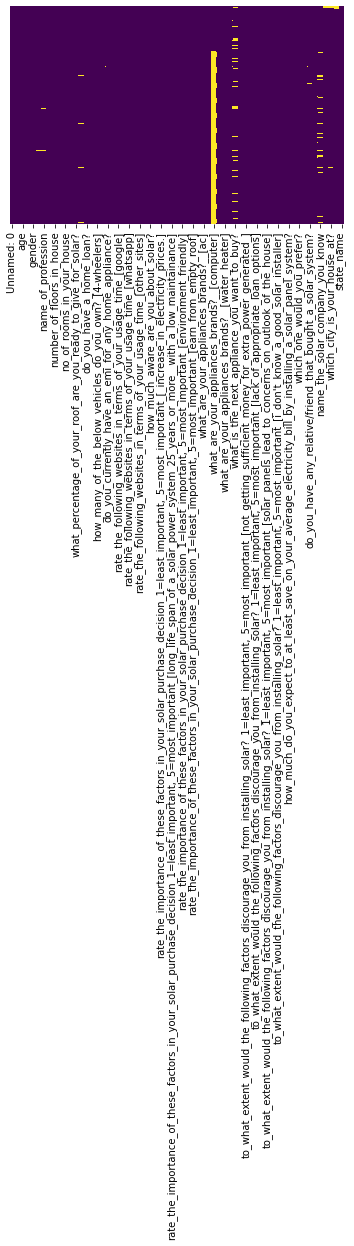

In [ ]:
plt.figure()
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
cols = list(df_1.columns)

df_1[cols]=df_1[cols].fillna(df_1.mode().iloc[0])

df_1.drop(columns=['what_are_your_appliances_brands?__[computer]'], inplace=True)

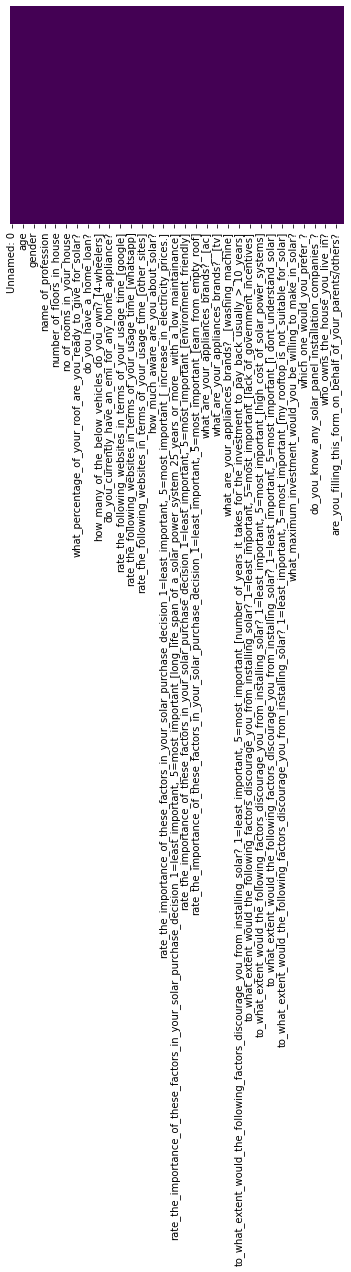

In [ ]:
plt.figure()
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print(df_1.shape)
df_1.columns = df_1.columns.str.strip().str.lower().str.replace('_', ' ')
df_1.to_csv('Data Analytics Works.csv')

(4798, 62)
